In [2]:
import pandas as pd
import numpy as np  

df = pd.read_csv("books_fixed_local_backup.csv")
df.head()

,book_id,isbn_13,isbn_10,title,authors,description,raw_categories,primary_genre,page_count,published_year,publisher,cover_image_url,language
0,1,9.780550e+12,553902547,Journey to the Center of the Earth,Jules Verne,"In this classic science fiction novel, Profess...",Fiction,fiction,242,2006.0,Bantam,http://books.google.com/books/content?id=icKmd...,en
1,2,9.789390e+12,9388423038,Oliver Twist,Charles Dickens,"Set in Victorian England, Charles Dickens' cla...",Fiction,fiction,220,2019.0,Jaico Publishing House,http://books.google.com/books/content?id=3oSqD...,en
2,3,9.780680e+12,679720219,The Plague,Albert Camus,Set in the fictional town of Oran during World...,Fiction,fiction,322,1991.0,Vintage,http://books.google.com/books/content?id=KVGd-...,en
3,4,NaN,NaN,Mrs. Dalloway,Virginia Woolf,"Set in post-World War I London, Virginia Woolf...",Fiction,fiction,312,1925.0,Houghton Mifflin Harcourt,http://books.google.com/books/content?id=OqAFA...,en
4,5,NaN,NaN,The Mayor of Casterbridge (Historical Novel),Thomas Hardy,Description unavailable.,Fiction,fiction,323,2022.0,e-artnow,http://books.google.com/books/content?id=ng9iE...,en


In [6]:
print(df['raw_categories'].isna().sum())

94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_id          733 non-null    int64  
 1   isbn_13          591 non-null    float64
 2   isbn_10          564 non-null    object 
 3   title            733 non-null    object 
 4   authors          733 non-null    object 
 5   description      733 non-null    object 
 6   raw_categories   639 non-null    object 
 7   primary_genre    733 non-null    object 
 8   page_count       733 non-null    int64  
 9   published_year   731 non-null    float64
 10  publisher        567 non-null    object 
 11  cover_image_url  694 non-null    object 
 12  language         733 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 74.6+ KB


In [8]:
df['raw_categories'].value_counts()

raw_categories
Fiction                      162
Philosophy                    54
History                       53
Biography & Autobiography     52
Juvenile Fiction              41
                            ... 
Adlerian psychology            1
Dragons                        1
Interpersonal relations        1
Big bang theory                1
Awareness                      1
Name: count, Length: 88, dtype: int64

In [9]:
df.describe()

,book_id,isbn_13,page_count,published_year
count,733.000000,5.910000e+02,733.000000,731.000000
mean,367.000000,9.782004e+12,342.851296,2003.309166
std,211.743162,3.910111e+09,194.011509,18.822172
min,1.000000,9.780000e+12,50.000000,1872.000000
25%,184.000000,9.780440e+12,208.000000,1997.000000
50%,367.000000,9.780870e+12,300.000000,2007.000000
75%,550.000000,9.781560e+12,434.000000,2015.500000
max,733.000000,9.798890e+12,1193.000000,2025.000000


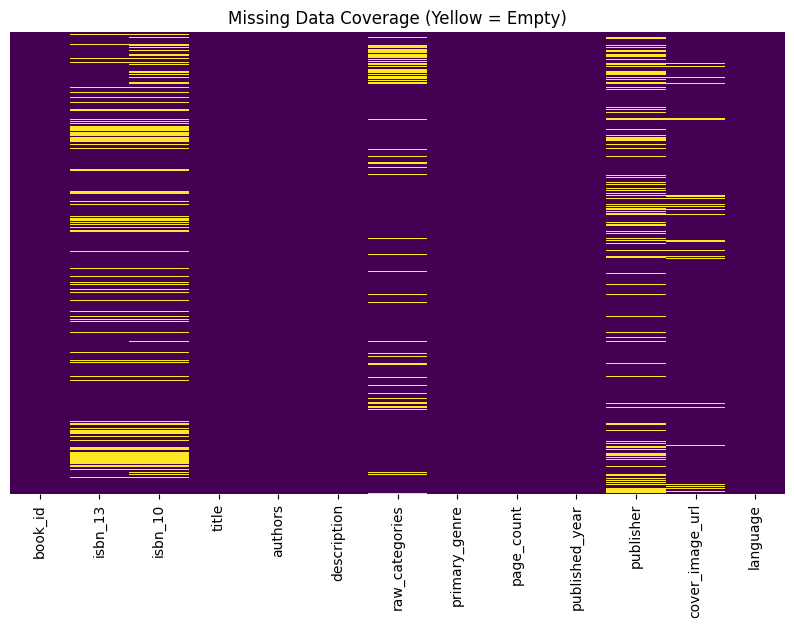

In [13]:
import matplotlib.pyplot  as plt 
import seaborn  as sns 

%matplotlib inline

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Data Coverage (Yellow = Empty)")
plt.show()

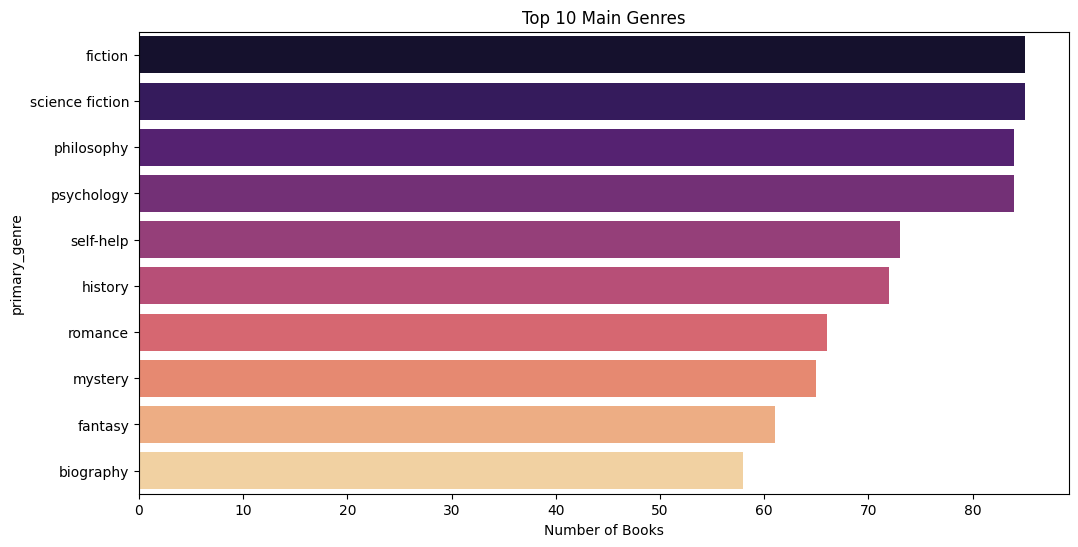

In [14]:
plt.figure(figsize=(12, 6))
# Get top 10 genres
top_genres = df['primary_genre'].value_counts().head(10)

sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='magma', legend=False)
plt.title("Top 10 Main Genres")
plt.xlabel("Number of Books")
plt.show()

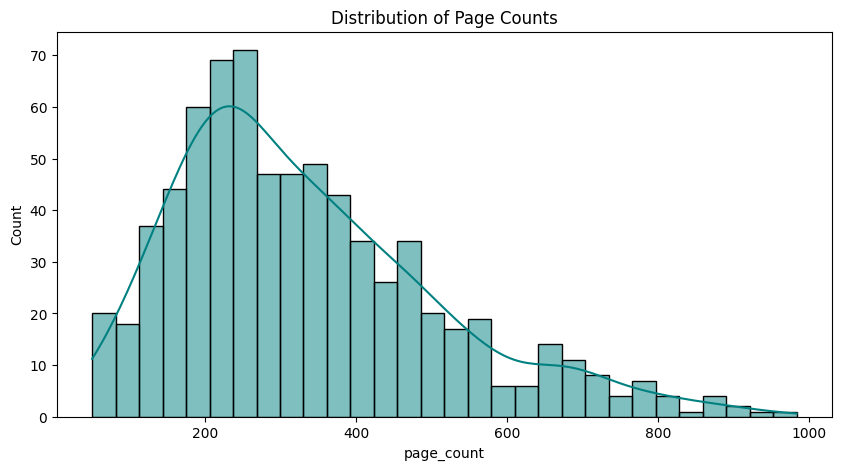

In [15]:
plt.figure(figsize=(10, 5))
# Filtering out extreme outliers if any
sns.histplot(df[df['page_count'] < 1000]['page_count'], bins=30, kde=True, color='teal')
plt.title("Distribution of Page Counts")
plt.show()

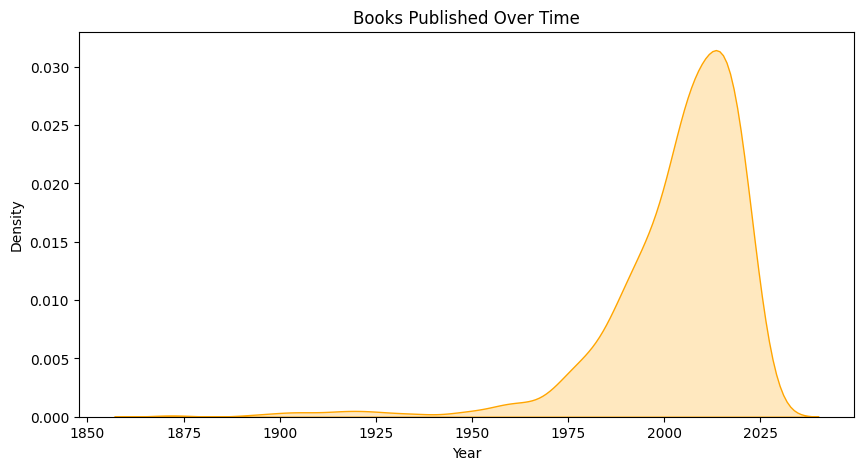

In [16]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['published_year'].dropna(), fill=True, color="orange")
plt.title("Books Published Over Time")
plt.xlabel("Year")
plt.show()

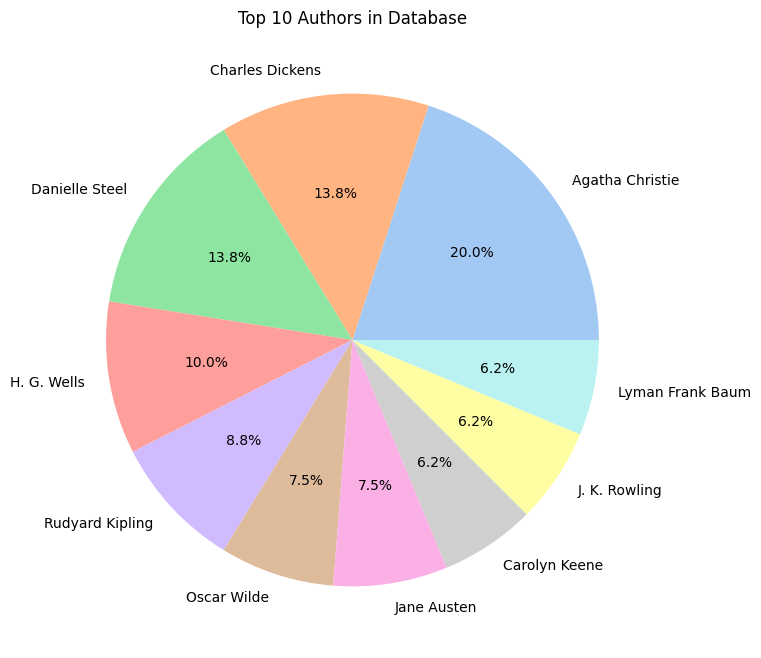

In [17]:
plt.figure(figsize=(12, 8))
top_authors = df['authors'].value_counts().head(10)

plt.pie(top_authors, labels=top_authors.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Top 10 Authors in Database")
plt.show()

In [20]:
df['description'].value_counts()

description
Description unavailable.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [21]:
# Find all columns that contain text/strings
text_columns = df.select_dtypes(include=['object']).columns
# Apply lowercase to all of them
df[text_columns] = df[text_columns].apply(lambda x: x.str.lower())
# Optional: strip whitespace while you're at it
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip())

In [22]:
df.head()

,book_id,isbn_13,isbn_10,title,authors,description,raw_categories,primary_genre,page_count,published_year,publisher,cover_image_url,language
0,1,9.780550e+12,553902547,journey to the center of the earth,jules verne,"in this classic science fiction novel, profess...",fiction,fiction,242,2006.0,bantam,http://books.google.com/books/content?id=ickmd...,en
1,2,9.789390e+12,9388423038,oliver twist,charles dickens,"set in victorian england, charles dickens' cla...",fiction,fiction,220,2019.0,jaico publishing house,http://books.google.com/books/content?id=3osqd...,en
2,3,9.780680e+12,679720219,the plague,albert camus,set in the fictional town of oran during world...,fiction,fiction,322,1991.0,vintage,http://books.google.com/books/content?id=kvgd-...,en
3,4,NaN,NaN,mrs. dalloway,virginia woolf,"set in post-world war i london, virginia woolf...",fiction,fiction,312,1925.0,houghton mifflin harcourt,http://books.google.com/books/content?id=oqafa...,en
4,5,NaN,NaN,the mayor of casterbridge (historical novel),thomas hardy,description unavailable.,fiction,fiction,323,2022.0,e-artnow,http://books.google.com/books/content?id=ng9ie...,en


In [23]:
df['description'].value_counts()

description
description unavailable.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [24]:
# Drop rows where description (minus the trailing dot) matches
df = df[df['description'].str.rstrip('.') != 'description unavailable']

In [25]:
df['description'].value_counts()

description
in this classic science fiction novel, professor lidenbrock discovers an ancient icelandic manuscript that leads him on an expedition to the center of the earth. alongside his friends hans and axel, they embark on a perilous journey through treacherous landscapes, encountering prehistoric creatures and overcoming countless obstacles. as they delve deeper into the earth's core, they uncover hidden treasures and face unexpected dangers. the group must use their ingenuity, courage, and scientific knowledge to survive and ultimately find their way back to the surface. through verne's meticulous research and vivid descriptions, the novel takes readers on a thrilling adventure of exploration and discovery.                                                                                                                                                                                                                                                                                       

In [26]:
print(f"Current row count: {len(df)}")
df[['title', 'description']].head()

Current row count: 609


,title,description
0,journey to the center of the earth,"in this classic science fiction novel, profess..."
1,oliver twist,"set in victorian england, charles dickens' cla..."
2,the plague,set in the fictional town of oran during world...
3,mrs. dalloway,"set in post-world war i london, virginia woolf..."
6,the picture of dorian gray,"the picture of dorian gray, written by oscar w..."


In [27]:
# We use a regex pattern: 
# [\"\'{}:] matches any of the characters inside the brackets
# |description matches the literal word "description"
import re

pattern = r'["\'\{\}:]|description'

df['description'] = df['description'].str.replace(pattern, '', regex=True).str.strip()

In [28]:
# Check a few rows to see the difference
print(df['description'].head(50))

0     in this classic science fiction novel, profess...
1     set in victorian england, charles dickens clas...
2     set in the fictional town of oran during world...
3     set in post-world war i london, virginia woolf...
6     the picture of dorian gray, written by oscar w...
7     the visitor by lee child revolves around jack ...
8     set in the jungles of india, the jungle book i...
9     the devil wears prada, written by lauren weisb...
10    fugitive pieces by anne michaels is a novel th...
11    the odyssey of homer is an ancient greek epic ...
12    set in ancient mesopotamia, the poem follows t...
13    in the happy prince and other tales, oscar wil...
14    in the valley of fear, sherlock holmes investi...
15    in the world set free, h.g. wells depicts a fu...
16    in sense and sensibility - illustrated edition...
17    vanity fair is a novel by william makepeace th...
18    set against the backdrop of the yorkshire moor...
19    1601 conversation as it was by the social 

In [29]:
# New symbols added: [] () — - • * & # “” ‘’ \n \t
# We also keep the word "description" you wanted removed
import re

pattern = r'["\'\{\}:\[\]\(\)\—\-\•\*\&\#\“\”\‘\’\n\t]|description'

# 1. Remove the characters and word
df['description'] = df['description'].str.replace(pattern, ' ', regex=True)

# 2. Crucial: Replace multiple spaces with a single space
df['description'] = df['description'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [30]:
# Check a few rows to see the difference
print(df['description'].head(50))

0     in this classic science fiction novel, profess...
1     set in victorian england, charles dickens clas...
2     set in the fictional town of oran during world...
3     set in post world war i london, virginia woolf...
6     the picture of dorian gray, written by oscar w...
7     the visitor by lee child revolves around jack ...
8     set in the jungles of india, the jungle book i...
9     the devil wears prada, written by lauren weisb...
10    fugitive pieces by anne michaels is a novel th...
11    the odyssey of homer is an ancient greek epic ...
12    set in ancient mesopotamia, the poem follows t...
13    in the happy prince and other tales, oscar wil...
14    in the valley of fear, sherlock holmes investi...
15    in the world set free, h.g. wells depicts a fu...
16    in sense and sensibility illustrated edition b...
17    vanity fair is a novel by william makepeace th...
18    set against the backdrop of the yorkshire moor...
19    1601 conversation as it was by the social 

In [31]:
import re

# We add \/ for forward slash and \\ for backslash
pattern = r'["\'\{\}:\[\]\(\)\—\-\•\*\&\#\“\”\‘\’\n\t\\/]|description'

# 1. Replace symbols and word 'description' with a space
df['description'] = df['description'].str.replace(pattern, ' ', regex=True)

# 2. Clean up resulting double-spaces and trim the ends
df['description'] = df['description'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [32]:
# Check a few rows to see the difference
print(df['description'].head(50))

0     in this classic science fiction novel, profess...
1     set in victorian england, charles dickens clas...
2     set in the fictional town of oran during world...
3     set in post world war i london, virginia woolf...
6     the picture of dorian gray, written by oscar w...
7     the visitor by lee child revolves around jack ...
8     set in the jungles of india, the jungle book i...
9     the devil wears prada, written by lauren weisb...
10    fugitive pieces by anne michaels is a novel th...
11    the odyssey of homer is an ancient greek epic ...
12    set in ancient mesopotamia, the poem follows t...
13    in the happy prince and other tales, oscar wil...
14    in the valley of fear, sherlock holmes investi...
15    in the world set free, h.g. wells depicts a fu...
16    in sense and sensibility illustrated edition b...
17    vanity fair is a novel by william makepeace th...
18    set against the backdrop of the yorkshire moor...
19    1601 conversation as it was by the social 

In [33]:
df['description'].value_counts()

description
in this classic science fiction novel, professor lidenbrock discovers an ancient icelandic manuscript that leads him on an expedition to the center of the earth. alongside his friends hans and axel, they embark on a perilous journey through treacherous landscapes, encountering prehistoric creatures and overcoming countless obstacles. as they delve deeper into the earths core, they uncover hidden treasures and face unexpected dangers. the group must use their ingenuity, courage, and scientific knowledge to survive and ultimately find their way back to the surface. through vernes meticulous research and vivid s, the novel takes readers on a thrilling adventure of exploration and discovery.                                                                                                                                                                                                                                                                                                    

In [34]:
df.head()

,book_id,isbn_13,isbn_10,title,authors,description,raw_categories,primary_genre,page_count,published_year,publisher,cover_image_url,language
0,1,9.780550e+12,553902547,journey to the center of the earth,jules verne,"in this classic science fiction novel, profess...",fiction,fiction,242,2006.0,bantam,http://books.google.com/books/content?id=ickmd...,en
1,2,9.789390e+12,9388423038,oliver twist,charles dickens,"set in victorian england, charles dickens clas...",fiction,fiction,220,2019.0,jaico publishing house,http://books.google.com/books/content?id=3osqd...,en
2,3,9.780680e+12,679720219,the plague,albert camus,set in the fictional town of oran during world...,fiction,fiction,322,1991.0,vintage,http://books.google.com/books/content?id=kvgd-...,en
3,4,NaN,NaN,mrs. dalloway,virginia woolf,"set in post world war i london, virginia woolf...",fiction,fiction,312,1925.0,houghton mifflin harcourt,http://books.google.com/books/content?id=oqafa...,en
6,7,9.780360e+12,359788335,the picture of dorian gray,oscar wilde,"the picture of dorian gray, written by oscar w...",fiction,fiction,188,2019.0,lulu.com,http://books.google.com/books/content?id=6vgid...,en


In [35]:
# 1. Convert actual empty strings "" or "[]" to actual NaN values
# This ensures fillna() catches both types of 'empty'
df['raw_categories'] = df['raw_categories'].replace(['', '[]'], np.nan)
# 2. Fill the missing raw_categories using the value from primary_genre
df['raw_categories'] = df['raw_categories'].fillna(df['primary_genre'])

In [36]:
df.head()

,book_id,isbn_13,isbn_10,title,authors,description,raw_categories,primary_genre,page_count,published_year,publisher,cover_image_url,language
0,1,9.780550e+12,553902547,journey to the center of the earth,jules verne,"in this classic science fiction novel, profess...",fiction,fiction,242,2006.0,bantam,http://books.google.com/books/content?id=ickmd...,en
1,2,9.789390e+12,9388423038,oliver twist,charles dickens,"set in victorian england, charles dickens clas...",fiction,fiction,220,2019.0,jaico publishing house,http://books.google.com/books/content?id=3osqd...,en
2,3,9.780680e+12,679720219,the plague,albert camus,set in the fictional town of oran during world...,fiction,fiction,322,1991.0,vintage,http://books.google.com/books/content?id=kvgd-...,en
3,4,NaN,NaN,mrs. dalloway,virginia woolf,"set in post world war i london, virginia woolf...",fiction,fiction,312,1925.0,houghton mifflin harcourt,http://books.google.com/books/content?id=oqafa...,en
6,7,9.780360e+12,359788335,the picture of dorian gray,oscar wilde,"the picture of dorian gray, written by oscar w...",fiction,fiction,188,2019.0,lulu.com,http://books.google.com/books/content?id=6vgid...,en


In [37]:
df.head(100
)

,book_id,isbn_13,isbn_10,title,authors,description,raw_categories,primary_genre,page_count,published_year,publisher,cover_image_url,language
0,1,9.780550e+12,553902547,journey to the center of the earth,jules verne,"in this classic science fiction novel, profess...",fiction,fiction,242,2006.0,bantam,http://books.google.com/books/content?id=ickmd...,en
1,2,9.789390e+12,9388423038,oliver twist,charles dickens,"set in victorian england, charles dickens clas...",fiction,fiction,220,2019.0,jaico publishing house,http://books.google.com/books/content?id=3osqd...,en
2,3,9.780680e+12,679720219,the plague,albert camus,set in the fictional town of oran during world...,fiction,fiction,322,1991.0,vintage,http://books.google.com/books/content?id=kvgd-...,en
3,4,NaN,NaN,mrs. dalloway,virginia woolf,"set in post world war i london, virginia woolf...",fiction,fiction,312,1925.0,houghton mifflin harcourt,http://books.google.com/books/content?id=oqafa...,en
6,7,9.780360e+12,359788335,the picture of dorian gray,oscar wilde,"the picture of dorian gray, written by oscar w...",fiction,fiction,188,2019.0,lulu.com,http://books.google.com/books/content?id=6vgid...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,NaN,NaN,the brothers lionheart,astrid lindgren,the brothers lionheart is a childrens novel by...,juvenile nonfiction,fantasy,196,1985.0,puffin,http://books.google.com/books/content?id=nsfaa...,en
102,103,9.780440e+12,439791324,harry potter and the half-blood prince,j. k. rowling,harry potter returns to hogwarts school of wit...,juvenile fiction,fantasy,652,2005.0,arthur a levine,http://books.google.com/books/content?id=owiau...,en
103,104,9.780550e+12,552559962,brisingr,christopher paolini,"in the midst of the war of the spear, eragon f...",juvenile nonfiction,fantasy,790,2009.0,random house,http://books.google.com/books/content?id=fmmfg...,en
104,105,NaN,NaN,the land of oz,lyman frank baum,"in the land of oz by l. frank baum, dorothy ga...","children's stories, american",fantasy,322,1904.0,reilly & lee company,http://books.google.com/books/content?id=8m2jc...,en


In [38]:
df['raw_categories'].isna().sum()

np.int64(0)

In [40]:
row =df[df["isbn_10"]== 9798728329992]
print(row)

Empty DataFrame
Columns: [book_id, isbn_13, isbn_10, title, authors, description, raw_categories, primary_genre, page_count, published_year, publisher, cover_image_url, language]
Index: []


In [42]:
df.head(40)

,book_id,isbn_13,isbn_10,title,authors,description,raw_categories,primary_genre,page_count,published_year,publisher,cover_image_url,language
0,1,9.780550e+12,553902547,journey to the center of the earth,jules verne,"in this classic science fiction novel, profess...",fiction,fiction,242,2006.0,bantam,http://books.google.com/books/content?id=ickmd...,en
1,2,9.789390e+12,9388423038,oliver twist,charles dickens,"set in victorian england, charles dickens clas...",fiction,fiction,220,2019.0,jaico publishing house,http://books.google.com/books/content?id=3osqd...,en
2,3,9.780680e+12,679720219,the plague,albert camus,set in the fictional town of oran during world...,fiction,fiction,322,1991.0,vintage,http://books.google.com/books/content?id=kvgd-...,en
3,4,NaN,NaN,mrs. dalloway,virginia woolf,"set in post world war i london, virginia woolf...",fiction,fiction,312,1925.0,houghton mifflin harcourt,http://books.google.com/books/content?id=oqafa...,en
6,7,9.780360e+12,359788335,the picture of dorian gray,oscar wilde,"the picture of dorian gray, written by oscar w...",fiction,fiction,188,2019.0,lulu.com,http://books.google.com/books/content?id=6vgid...,en
7,8,9.780550e+12,553811886,the visitor,lee child,the visitor by lee child revolves around jack ...,fiction,fiction,516,2001.0,random house,http://books.google.com/books/content?id=uguah...,en
8,9,9.798730e+12,NaN,the jungle book illustrated,rudyard kipling,"set in the jungles of india, the jungle book i...",fiction,fiction,198,2021.0,NaN,http://books.google.com/books/content?id=bhhgz...,en
9,10,9.780790e+12,786255757,the devil wears prada,lauren weisberger,"the devil wears prada, written by lauren weisb...",fiction,fiction,692,2003.0,NaN,http://books.google.com/books/content?id=1ippa...,en
10,11,9.780790e+12,786212004,fugitive pieces,anne michaels,fugitive pieces by anne michaels is a novel th...,fiction,fiction,368,1997.0,NaN,http://books.google.com/books/content?id=eihmv...,en
11,12,9.780550e+12,553897772,the odyssey of homer,homer,the odyssey of homer is an ancient greek epic ...,fiction,fiction,559,2005.0,bantam classics,http://books.google.com/books/content?id=oryo8...,en


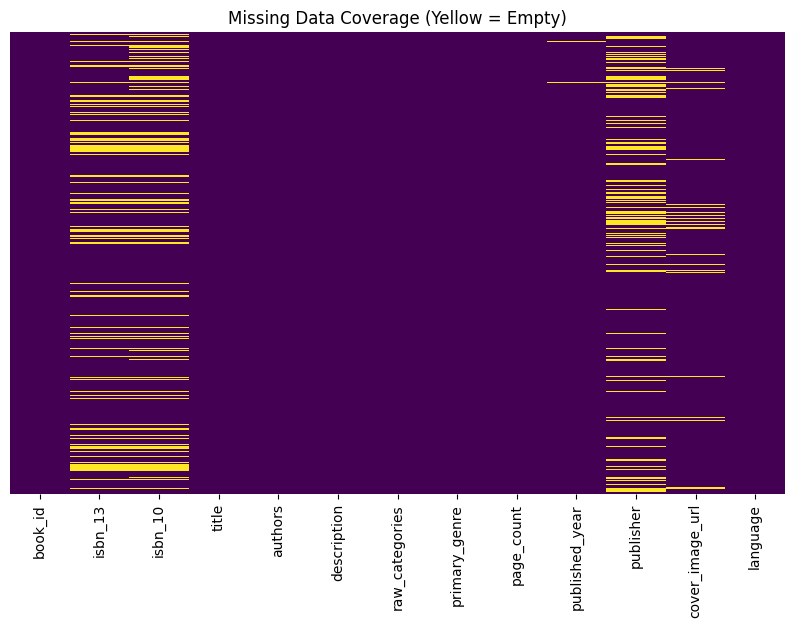

In [43]:
%matplotlib inline

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing Data Coverage (Yellow = Empty)")
plt.show()

In [46]:
# Convert to 'nullable integer'
df['published_year'] = df['published_year'].astype('Int64')

In [47]:
df.head()

,book_id,isbn_13,isbn_10,title,authors,description,raw_categories,primary_genre,page_count,published_year,publisher,cover_image_url,language
0,1,9.780550e+12,553902547,journey to the center of the earth,jules verne,"in this classic science fiction novel, profess...",fiction,fiction,242,2006,bantam,http://books.google.com/books/content?id=ickmd...,en
1,2,9.789390e+12,9388423038,oliver twist,charles dickens,"set in victorian england, charles dickens clas...",fiction,fiction,220,2019,jaico publishing house,http://books.google.com/books/content?id=3osqd...,en
2,3,9.780680e+12,679720219,the plague,albert camus,set in the fictional town of oran during world...,fiction,fiction,322,1991,vintage,http://books.google.com/books/content?id=kvgd-...,en
3,4,NaN,NaN,mrs. dalloway,virginia woolf,"set in post world war i london, virginia woolf...",fiction,fiction,312,1925,houghton mifflin harcourt,http://books.google.com/books/content?id=oqafa...,en
6,7,9.780360e+12,359788335,the picture of dorian gray,oscar wilde,"the picture of dorian gray, written by oscar w...",fiction,fiction,188,2019,lulu.com,http://books.google.com/books/content?id=6vgid...,en


In [48]:
df = df.drop(columns=['language'])

In [49]:
df.head()

,book_id,isbn_13,isbn_10,title,authors,description,raw_categories,primary_genre,page_count,published_year,publisher,cover_image_url
0,1,9.780550e+12,553902547,journey to the center of the earth,jules verne,"in this classic science fiction novel, profess...",fiction,fiction,242,2006,bantam,http://books.google.com/books/content?id=ickmd...
1,2,9.789390e+12,9388423038,oliver twist,charles dickens,"set in victorian england, charles dickens clas...",fiction,fiction,220,2019,jaico publishing house,http://books.google.com/books/content?id=3osqd...
2,3,9.780680e+12,679720219,the plague,albert camus,set in the fictional town of oran during world...,fiction,fiction,322,1991,vintage,http://books.google.com/books/content?id=kvgd-...
3,4,NaN,NaN,mrs. dalloway,virginia woolf,"set in post world war i london, virginia woolf...",fiction,fiction,312,1925,houghton mifflin harcourt,http://books.google.com/books/content?id=oqafa...
6,7,9.780360e+12,359788335,the picture of dorian gray,oscar wilde,"the picture of dorian gray, written by oscar w...",fiction,fiction,188,2019,lulu.com,http://books.google.com/books/content?id=6vgid...


In [50]:
df.to_csv('books_cleaned.csv', index=False)

In [ ]:
''' Standardization: Lowercased all text across all string columns to ensure consistency for the recommendation algorithm.
Filtering Placeholder Data: Identified and removed rows containing "Description unavailable." or "description unavailable", as they provide no value for recommendations.
Noise Removal (Regex): Cleaned the description column by stripping out technical noise and non-essential symbols:
Quotes & Brackets: Removed ", ', {, }, [, ].
Punctuation & Slashes: Removed :, /, and \.
Special Artifacts: Cleaned up web-search artifacts like bullets (•), em-dashes (—), and the literal word "description".
Whitespace Management: Replaced all multiple spaces with single spaces and trimmed the ends.
Phase 3: Missing Value Handling & Optimization
Category Imputation: Filled missing values in raw_categories by copying the data from the primary_genre column for those specific rows.
Column Removal: Identified how to drop unnecessary columns (like isbn_10 or cover_image_url) to keep the database lean.
Type Casting: Prepared the published_year column for conversion from a decimal (2006.0) to a clean integer (2006) using the Int64 type.
Phase 4: Exporting
Final Export: Prepared the export command to save the results as books_cleaned.csv using UTF-8 encoding and index=False to maintain data integrity. '''